<a href="https://colab.research.google.com/github/paulo-lins/EDA_datasus/blob/main/EDA_tabnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Through **DATASUS** (site: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def) we will access Hospital Production data, by region and federation unit, since 2008 and we will analyze the total amount spent on health by the federal government. We will search for this data through **TABNET**, a portal available on the website above. In our dataframe we will use the year and month of processing, which is when the values ​​are processed and passed on to the manager or hospital institution.

This notebook contains the exploratory analysis of data from "Datasus" from the year 2008 to the last year of processing available on the website above.

In [49]:
import pandas as pd
import numpy as pd

In [2]:
# IIn Brazil sometimes we will have to use encoding='ISO-8859-1' for Latin characters

url = 'https://raw.githubusercontent.com/paulo-lins/EDA_datasus/main/A173927189_28_143_208.csv'

# df1 = pd.read_csv(url, encoding='ISO-8859-1') *

# this returns us ------> ParserError                               
# Traceback (most recent call last)
# <ipython-input-3-de3887ba5c9c> in <module>()
#      3 url = 'https://raw.githubusercontent.com/paulo-lins/EDA_datasus/main/A173927189_28_143_208.csv'
#      4 
#----> 5 df1 = pd.read_csv(url, encoding='ISO-8859-1')

#8 frames
#/usr/local/lib/python3.7/dist-packages/pandas/_libs/parsers.pyx in pandas._libs.parsers.raise_parser_error()

#ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 174

In [3]:
# Atention, (ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 174), 
# this error is related to some problem reading the data. As header and what kind of separator... in this case it's set to ',' but when we open the file we observe that it is separated by ';'

In [4]:
tabnet_data = pd.read_csv(url, 
                  encoding='ISO-8859-1',
                  skiprows=3,     #skip unnecessary lines
                  skipfooter=12,  #skip unnecessary footer
                  sep=';',        #set the separator
                  thousands='.',   #set the thousand to '.'
                  decimal=',')    #set the decimal to ','
tabnet_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,2022/Abr,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,13054440.15,12112418.95,9765323.52,11091614.20,11206618.94,11050292.93,12371950.02,11554081.53,9895887.03,1.168339e+09
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,4138751.64,4260017.06,3828566.34,2889654.47,3138245.58,3547361.84,3424337.76,3584824.97,-,4.999633e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,22720450.82,21120609.03,16901290.05,18371952.43,17783646.65,15403023.75,17984992.03,19409055.43,17572660.38,2.189227e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3781921.16,3150835.05,3185551.53,3022781.41,3129225.29,3024454.61,3097211.89,3328597.91,3266805.71,3.746009e+08
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,45126860.59,45771568.39,45038864.11,44566789.75,44358065.42,44802364.31,44554060.25,42076801.20,43170314.35,5.311265e+09


In [5]:
#show the last 5 lines
tabnet_data.tail() 

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,2022/Abr,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,1.375493e+08,1.229436e+08,1.147044e+08,1.151691e+08,1.143993e+08,1.027617e+08,1.059412e+08,1.082238e+08,103246325.57,1.439021e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,3.671334e+07,3.314037e+07,2.399633e+07,2.434326e+07,2.200306e+07,2.202217e+07,2.404754e+07,2.447686e+07,20695521.11,2.680512e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,3.896208e+07,2.928720e+07,2.791062e+07,2.156352e+07,2.031116e+07,2.069234e+07,2.233834e+07,2.001901e+07,16076544.64,2.539254e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,7.246173e+07,6.729214e+07,5.838279e+07,4.346182e+07,4.473026e+07,4.541720e+07,4.130926e+07,4.060964e+07,38726340.65,5.702548e+09
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,2.728877e+07,2.850999e+07,2.620743e+07,2.514746e+07,2.274292e+07,2.494576e+07,2.440409e+07,2.603333e+07,25430770.37,2.953368e+09


In [6]:
# let's calculate the average caste per month in each state. For this we will use the mean, but first, we will change all
tabnet_data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2021/Dez    5.814510e+07
2022/Jan    5.788532e+07
2022/Fev    5.802283e+07
2022/Mar    5.754811e+07
Total       7.268224e+09
Length: 171, dtype: float64

In [7]:
# It is a little difficult to understand the numbers above. For this, we will use pd.options.float = "{:.2f}".format
pd.options.display.float_format = "{:.2f}".format
tabnet_data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2021/Dez     58145101.08
2022/Jan     57885315.71
2022/Fev     58022827.57
2022/Mar     57548111.74
Total      7268224369.78
Length: 171, dtype: float64

In [8]:
# When we access the data like showed bellow, the python return a series
tabnet_data["2008/Ago"]


0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [9]:
# A series also has a mean function
tabnet_data["2008/Ago"].mean()

27800320.306666665

**Now, we will make a graphic for this month and year (August, 2008) for each state**

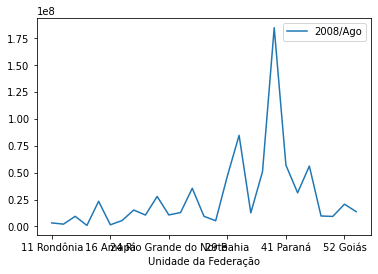

In [10]:
# we can see that using lines in this case is not the best choice to understand what we want to show
tabnet_data.plot(x='Unidade da Federação', y="2008/Ago")

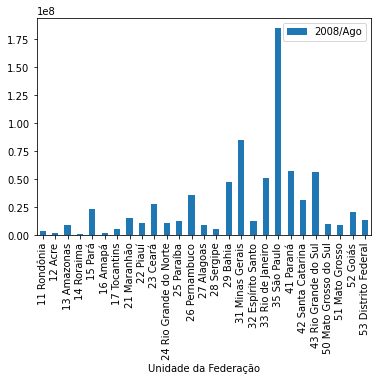

In [11]:
# We can do better using the parameter kind='bar'. It will show a vertical bar plot.
tabnet_data.plot(x='Unidade da Federação', y="2008/Ago", kind='bar')

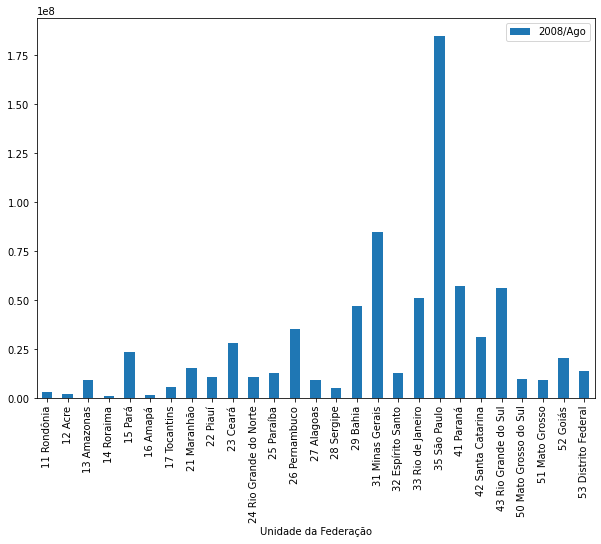

In [12]:
# We can change the size using the parameter figsize
tabnet_data.plot(x='Unidade da Federação', y="2008/Ago", kind='bar', figsize=(10,7))

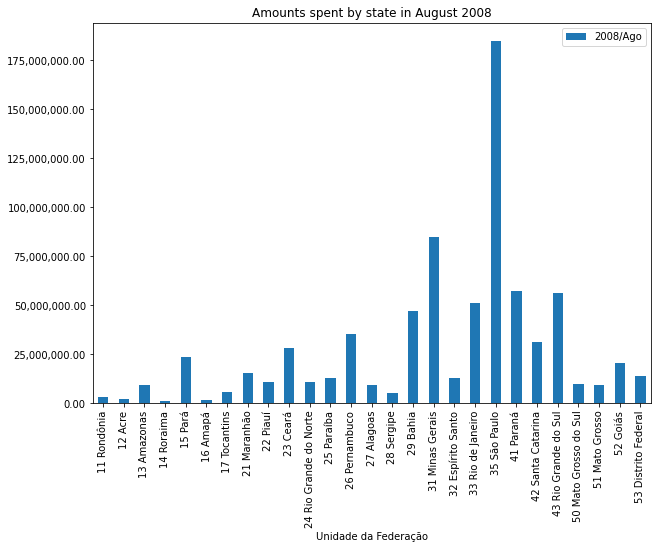

In [13]:
# For improve our graphic, we use the matplotlib. Python Matplotlib is a library of the Python programming language, used for data visualization and graphic plotting. With matplotlib we can do more things like to format a values on y axis

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = tabnet_data.plot(x='Unidade da Federação', y="2008/Ago", kind='bar', figsize=(10,7)) # ax is the abbreviation for axis
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) # Here, we're formatting for thousands with ',' and decimals with '.'

plt.title("Amounts spent by state in August 2008"); # using ';' at the end is the same that using plt.show()




Now we will do the same analysis for the most recent month and year

Text(0.5, 1.0, '"Amounts spent by state in March 2022"')

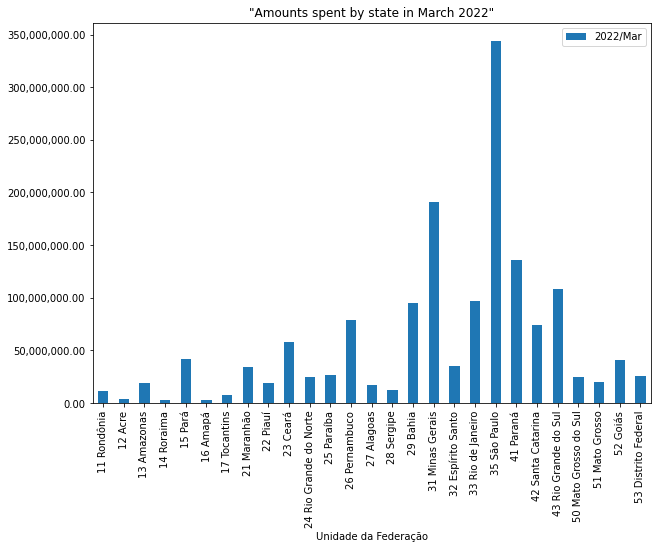

In [14]:
# the most recent mont and year with all informations in our dataframe is 2022/Mar

ax = tabnet_data.plot(x='Unidade da Federação', y="2022/Mar", kind="bar", figsize=(10,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.title('"Amounts spent by state in March 2022"')

In [15]:
url_1 = 'https://raw.githubusercontent.com/paulo-lins/EDA_datasus/main/A112952189_28_143_208.csv'

data_tabnet_1 = pd.read_csv(url_1, 
                            encoding='ISO-8859-1', 
                            skiprows=3, sep=';', 
                            skipfooter=11,
                            decimal=',',
                            thousands='.')
data_tabnet_1.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,2022/Abr,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82,2211331.68,1168339075.47
1,12 Acre,-,-,-,-,-,-,-,-,-,...,3613820.77,3285173.43,3369173.20,3704749.13,3147253.20,2928912.88,2009443.49,1001816.10,-,499963323.36
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,20481899.02,18358457.36,18983118.58,18608362.10,17961837.53,19184516.06,13643435.66,11391120.81,3331913.37,2189227062.50
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3600006.56,3092674.99,3108587.91,3001893.41,3030814.46,3290733.13,2725609.84,2938287.54,1430992.15,374600917.06
4,15 Pará,-,-,-,-,-,-,-,-,-,...,44039401.85,42569265.72,43945686.74,44278551.16,45022040.26,43586015.85,37961439.28,33357407.81,14014246.92,5311264998.18


In [16]:
# let´s take a look at two dates, 2008/Ago and 2008/Set
# Note: for this we will need to use this syntax tabnet_data[["2008/Aug", "2008/Sep"]] so we slice our dataframe into just two dates

data_tabnet_1[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [17]:
# Now let's get only dates that have all values ​​entered
# If we use tabnet_data.mean(), this function will only return dates with all values 

data_tabnet_1.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


2007/Ago        588123.21
2007/Set       1519994.43
2007/Out       4706028.57
2007/Nov      10640611.38
2007/Dez      23793093.17
                ...      
2021/Dez     103725482.47
2022/Jan     111765147.15
2022/Fev      88409821.37
2022/Mar      74376939.27
Total      14017275688.16
Length: 177, dtype: float64

In [18]:
# Let´s see the index...
data_tabnet_1.mean().index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2021/Jul', '2021/Ago', '2021/Set', '2021/Out', '2021/Nov', '2021/Dez',
       '2022/Jan', '2022/Fev', '2022/Mar', 'Total'],
      dtype='object', length=177)

In [19]:
# Let's name this index as 'usable_columns'
usable_columns = data_tabnet_1.mean().index
usable_columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2021/Jul', '2021/Ago', '2021/Set', '2021/Out', '2021/Nov', '2021/Dez',
       '2022/Jan', '2022/Fev', '2022/Mar', 'Total'],
      dtype='object', length=177)

In [20]:
# Now we only take these columns in our dataframe because, as we saw, all the values ​​were inserted in them
# note: there many ways to take only the columns where all values are present. This one is only one of them. 
data_tabnet_1[usable_columns].head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,Total
0,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,13840532.59,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82,1168339075.47
1,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3756879.42,3613820.77,3285173.43,3369173.20,3704749.13,3147253.20,2928912.88,2009443.49,1001816.10,499963323.36
2,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,23367088.66,20481899.02,18358457.36,18983118.58,18608362.10,17961837.53,19184516.06,13643435.66,11391120.81,2189227062.50
3,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3523628.56,3600006.56,3092674.99,3108587.91,3001893.41,3030814.46,3290733.13,2725609.84,2938287.54,374600917.06
4,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,45354581.45,44039401.85,42569265.72,43945686.74,44278551.16,45022040.26,43586015.85,37961439.28,33357407.81,5311264998.18


In [21]:
# Note: The index is an immutable series, to change the index we will transform it into a python list. We will do this to insert the value 'state'
usable_columns = data_tabnet_1.mean().index.tolist() # Now we have a python list and can make some changes like insert 'Unidade da Federação' (Unidade da Federação is another way to call states here in Brazil)
usable_columns.insert(0, 'Unidade da Federação')
data_tabnet_1[usable_columns].head() # So we will only see months with all present values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,13840532.59,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82,1168339075.47
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3756879.42,3613820.77,3285173.43,3369173.20,3704749.13,3147253.20,2928912.88,2009443.49,1001816.10,499963323.36
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,23367088.66,20481899.02,18358457.36,18983118.58,18608362.10,17961837.53,19184516.06,13643435.66,11391120.81,2189227062.50
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3523628.56,3600006.56,3092674.99,3108587.91,3001893.41,3030814.46,3290733.13,2725609.84,2938287.54,374600917.06
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,45354581.45,44039401.85,42569265.72,43945686.74,44278551.16,45022040.26,43586015.85,37961439.28,33357407.81,5311264998.18


In [22]:
# There is no reason for this numerical index. So we can change it using set_index('Unidade da Federação'). In this way, the states (Unidade da Federação) will be the new index.
# set_index return a new value so we need reassign

usable = data_tabnet_1[usable_columns] 
usable.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,13840532.59,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82,1168339075.47
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3756879.42,3613820.77,3285173.43,3369173.20,3704749.13,3147253.20,2928912.88,2009443.49,1001816.10,499963323.36
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,23367088.66,20481899.02,18358457.36,18983118.58,18608362.10,17961837.53,19184516.06,13643435.66,11391120.81,2189227062.50
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3523628.56,3600006.56,3092674.99,3108587.91,3001893.41,3030814.46,3290733.13,2725609.84,2938287.54,374600917.06
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,45354581.45,44039401.85,42569265.72,43945686.74,44278551.16,45022040.26,43586015.85,37961439.28,33357407.81,5311264998.18


In [23]:
# set_index return a new value so we need reassign

usable = usable.set_index('Unidade da Federação')
usable

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,13840532.59,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82,1168339075.47
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3756879.42,3613820.77,3285173.43,3369173.20,3704749.13,3147253.20,2928912.88,2009443.49,1001816.10,499963323.36
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,23367088.66,20481899.02,18358457.36,18983118.58,18608362.10,17961837.53,19184516.06,13643435.66,11391120.81,2189227062.50
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3523628.56,3600006.56,3092674.99,3108587.91,3001893.41,3030814.46,3290733.13,2725609.84,2938287.54,374600917.06
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,45354581.45,44039401.85,42569265.72,43945686.74,44278551.16,45022040.26,43586015.85,37961439.28,33357407.81,5311264998.18
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,4838664.55,3270848.94,2591304.85,2609596.55,2503056.50,2830533.47,2990370.73,1934134.55,950756.63,355296258.11
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,12621978.71,10974163.56,9254941.56,7603258.11,8253100.30,7311310.22,4987769.55,2760366.02,1484737.42,1176986939.63
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,45054211.12,42829805.40,36494568.05,37330067.47,34725553.20,34922133.30,37032102.16,27857199.57,22502888.05,4421777377.42
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,24120586.23,21162393.74,20810195.34,21790026.52,21401883.31,20248019.39,20960349.50,16379766.75,15572014.94,2599796687.65


In [24]:
# If we want to do a search by index, we can use, for example: usable.loc["29 Bahia"]. That way python will return every line where the index is "29 Bahia"

usable.loc["29 Bahia"]

2007/Ago        135146.36
2007/Set        448349.75
2007/Out       1382038.11
2007/Nov       3348779.62
2007/Dez      11948984.56
                ...      
2021/Dez      86728884.38
2022/Jan      88578418.29
2022/Fev      62111090.85
2022/Mar      37460272.11
Total      11084271493.92
Name: 29 Bahia, Length: 177, dtype: float64

In [25]:
# Let´s Transpose our dataframe

usable.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal,Total
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47,8233724.90
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25,21279921.98
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56,65884400.02
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48,148968559.33
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42,333103304.40


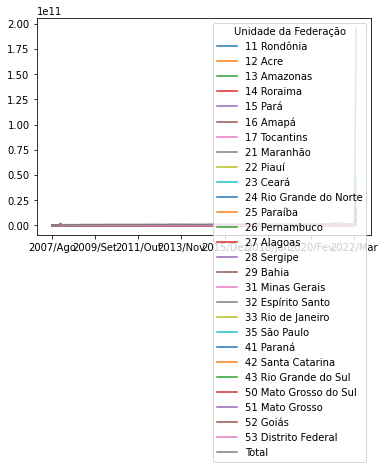

In [26]:
# Now we can see what a simple graph shows us
usable.T.plot()

In [37]:
# At the end of the graph we can see higher values. This is because at the end of the dataframe is the total (the sum of the values)
# Let´s drop this
usable = usable.T.drop('Total', axis=1) # here we need to specify the axis 0 for row and 1 for columns
usable

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,15025855.02,13840532.59,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4237769.92,3756879.42,3613820.77,3285173.43,3369173.20,3704749.13,3147253.20,2928912.88,2009443.49,1001816.10
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,22609998.75,23367088.66,20481899.02,18358457.36,18983118.58,18608362.10,17961837.53,19184516.06,13643435.66,11391120.81
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3508760.16,3523628.56,3600006.56,3092674.99,3108587.91,3001893.41,3030814.46,3290733.13,2725609.84,2938287.54
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,49007416.51,45354581.45,44039401.85,42569265.72,43945686.74,44278551.16,45022040.26,43586015.85,37961439.28,33357407.81
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,5584106.36,4838664.55,3270848.94,2591304.85,2609596.55,2503056.50,2830533.47,2990370.73,1934134.55,950756.63
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,13566443.19,12621978.71,10974163.56,9254941.56,7603258.11,8253100.30,7311310.22,4987769.55,2760366.02,1484737.42
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,54652517.68,45054211.12,42829805.40,36494568.05,37330067.47,34725553.20,34922133.30,37032102.16,27857199.57,22502888.05
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,27536061.00,24120586.23,21162393.74,20810195.34,21790026.52,21401883.31,20248019.39,20960349.50,16379766.75,15572014.94


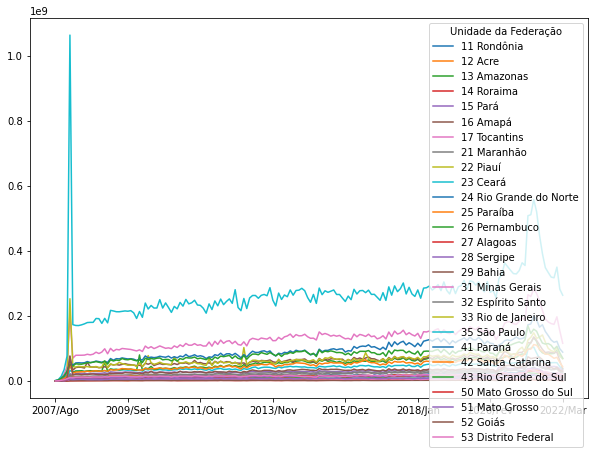

In [38]:
# We can see the difference in the graph (without the 'total' column)

usable.T.plot(figsize=(10, 7))


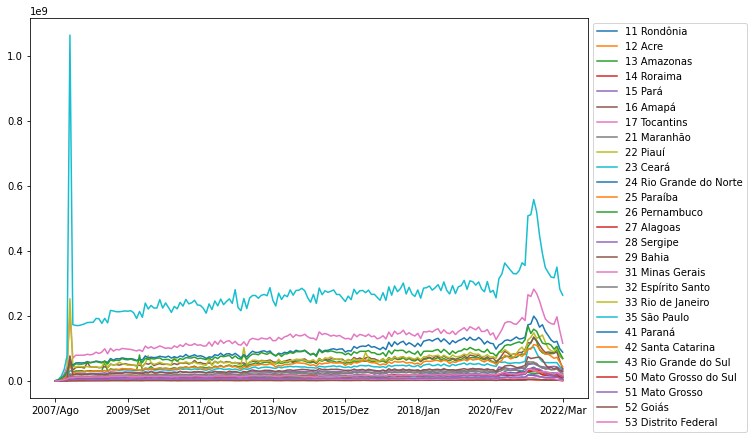

In [40]:
# Now, we can use the bbox_to_anchor keyword argument to place the legend outside the axes 
usable.T.plot(figsize=(10, 7))
plt.legend(bbox_to_anchor=(1, 0.5, 0, 0.5))


In [45]:
# Let's look at the states, if we use "usable.T.columns", they are now the columns.

usable.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

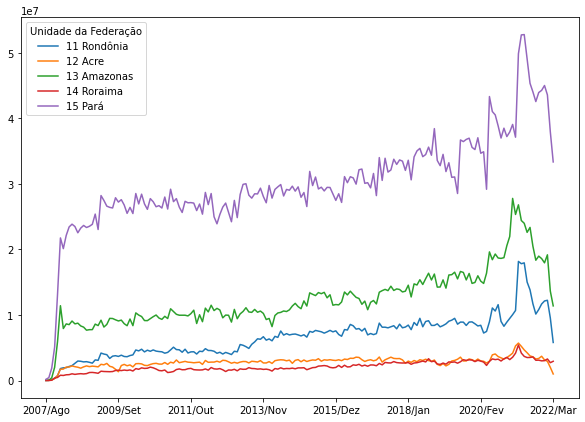

In [46]:
# Our graph will be better understood with fewer states. Let's pick five.
# Now we can see better the lines and values for each state 
usable[:5].T.plot(figsize=(10, 7)) # note: we´re using T (transpose)

In [47]:
# We can choose an 'n' number of random states using the sample(n=5) parameter. In this case for 5 random states
usable.sample(n=5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
29 Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,74951730.04,33410124.06,41342640.25,42826993.62,42112043.58,...,124784443.17,110978026.78,97126115.51,87438191.00,89199342.02,87960897.77,86728884.38,88578418.29,62111090.85,37460272.11
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,15025855.02,13840532.59,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,...,37647505.73,36194064.24,30923772.44,22123834.09,19112463.40,17906469.21,18873661.66,23561867.36,17415111.10,12807140.51
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,187763085.02,165485891.40,173023862.07,152412360.39,139634819.66,126148309.82,119099508.17,122074884.89,99076263.45,88685215.80
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1062876666.11,173178487.49,170692267.36,170449727.03,172573621.67,...,520280167.19,448012733.49,391602214.93,348446858.66,333549250.99,319492072.08,317195469.00,350031956.62,282140976.72,263637373.33


In [52]:
# for that, let's sum all the values ​​of each state. That is, all the values ​​of each row

usable.sum(axis=1)

Unidade da Federação
11 Rondônia               1166127139.46
12 Acre                    499962039.54
13 Amazonas               2185892317.72
14 Roraima                 373169511.22
15 Pará                   5297232215.66
16 Amapá                   355274160.39
17 Tocantins              1176697134.38
21 Maranhão               4410350584.38
22 Piauí                  2590879040.41
23 Ceará                  7508360195.58
24 Rio Grande do Norte    3039734673.29
25 Paraíba                2957839006.83
26 Pernambuco             9811377555.68
27 Alagoas                2513652983.74
28 Sergipe                1399728972.78
29 Bahia                 11072115568.33
31 Minas Gerais          23203560173.47
32 Espírito Santo         3965365673.46
33 Rio de Janeiro        11832656149.57
35 São Paulo             46578724617.09
41 Paraná                16647729497.84
42 Santa Catarina         8973892086.89
43 Rio Grande do Sul     14365479289.42
50 Mato Grosso do Sul     2677690211.20
51 Mato Grosso     

In [55]:
# now we will create the 'Total'. The same column we already drop.
usable['Total'] = usable.sum(axis=1)
usable.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,13840532.59,11700151.78,10142915.68,10829654.30,11676982.90,12140433.71,12246678.75,9555423.05,5807201.82,3498381418.38
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3756879.42,3613820.77,3285173.43,3369173.20,3704749.13,3147253.20,2928912.88,2009443.49,1001816.10,1499886118.62
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,23367088.66,20481899.02,18358457.36,18983118.58,18608362.10,17961837.53,19184516.06,13643435.66,11391120.81,6557676953.16
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3523628.56,3600006.56,3092674.99,3108587.91,3001893.41,3030814.46,3290733.13,2725609.84,2938287.54,1119508533.66
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,45354581.45,44039401.85,42569265.72,43945686.74,44278551.16,45022040.26,43586015.85,37961439.28,33357407.81,15891696646.98


In [61]:
# In the chart below we will take the five states with the highest health costs
# First we will sort values using 'Total' column
# so let's reassign our dataframe to 'sort_total'

sort_total = usable.sort_values(by='Total', ascending=False)

# Then again we will drop the 'Total' column

sort_total = sort_total.drop('Total', axis=1)
sort_total.head() # now, we can see the 5 states with the highest healthcare costs


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,2021/Dez,2022/Jan,2022/Fev,2022/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1062876666.11,173178487.49,170692267.36,170449727.03,172573621.67,...,520280167.19,448012733.49,391602214.93,348446858.66,333549250.99,319492072.08,317195469.00,350031956.62,282140976.72,263637373.33
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206687824.13,70301089.50,79119005.51,79046322.41,79268070.12,...,269136076.22,246357902.93,217052928.90,190903797.35,181571440.96,176449282.25,174231062.82,197349767.67,154029566.86,115965696.13
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,187763085.02,165485891.40,173023862.07,152412360.39,139634819.66,126148309.82,119099508.17,122074884.89,99076263.45,88685215.80
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,152818315.61,133175644.79,116646364.28,113620892.84,115169723.59,109993295.97,97845923.37,106760162.92,86604368.62,70309355.99
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,252841126.65,44128159.73,42916090.85,45324789.60,43951349.46,...,131270702.39,134724592.08,141551048.26,119585134.99,100460921.96,93154094.81,90159560.94,102949984.15,80256046.71,68765991.31


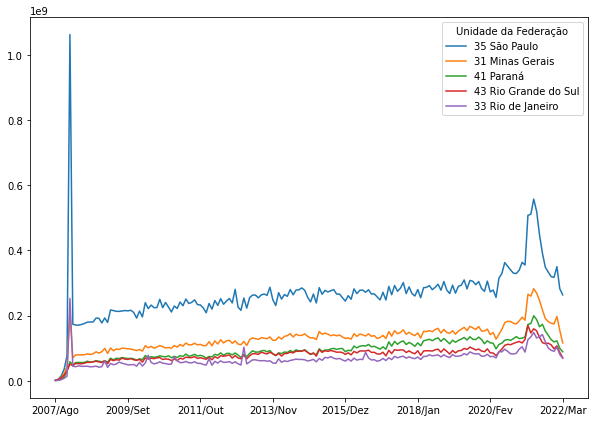

In [65]:
# now, we will plot the five states with the highest health costs
sort_total[:5].T.plot(figsize=(10,7))